In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv('cleaned_df.csv')
data.drop(data.columns.values[0], axis = 1, inplace = True)
data = data.fillna('No Info')

In [7]:
data.head()

,file_name,title,address,desc,url,coord,state,price,rooms,beds,...,View: City,Washer/Dryer In-Unit,Board Approval Required,Roof Deck,Gym,Private Roof Deck,state_code,latitude,longitude,days
0,10.html,For Rent: 74 Clarke Ave. in Jersey City,74 Clarke Avenue #22E,['74 CLARKE AVENUE #22E is a rental unit in Je...,['https://streeteasy.com/building/74-clarke-av...,"['', ' ']",['US-NJ'],1749,2,3,...,0,0,0,0,0,0,NJ,No Info,,No Info
1,100.html,For Rent: 1214 5th Ave. in Upper Carnegie Hill,1214 5th Avenue #29B,['1214 5th Ave #29B is a rental unit in Upper ...,['https://streeteasy.com/building/1214-fifth-a...,"['40.79140091', ' -73.95240021']",['US-NY'],5030,3,1,...,0,0,0,1,1,0,NY,40.79140091,-73.95240021,9
2,1000.html,For Rent: 3333 Henry Hudson Parkway in Riverdale,3333 Henry Hudson Parkway #18A,['3333 Henry Hudson Parkway #18A is a rental u...,['https://streeteasy.com/building/3333-henry-h...,"['40.88499832', ' -73.9151001']",['US-NY'],4195,4,2,...,0,0,0,0,1,0,NY,40.88499832,-73.9151001,No Info
3,10000.html,For Rent: 44 South Oxford St. in Fort Greene,44 South Oxford Street #2R,['44 SOUTH OXFORD STREET #2R is a rental unit ...,['https://streeteasy.com/building/44-south-oxf...,"['40.68832267', ' -73.97415708']",['US-NY'],3000,3,1,...,0,0,0,0,1,0,NY,40.68832267,-73.97415708,No Info
4,10001.html,For Rent: 25 West 68th St. in Lincoln Square,25 West 68th Street #6D,['25 WEST 68 STREET #6D is a rental unit in Li...,['https://streeteasy.com/building/25-west-68-s...,"['40.77435248', ' -73.97889675']",['US-NY'],4400,3,1,...,0,0,0,0,0,0,NY,40.77435248,-73.97889675,No Info


In [15]:
data['rooms'] = data['rooms'].replace('No Info', 0)

In [48]:
data['beds'] = data['beds'].replace('No Info', 0)
data['beds'] = data['beds'].astype(int)

In [49]:
beds_df = data['beds'].value_counts()
beds_df.index = beds_df.index.astype(int)
beds_df = beds_df.sort_index()

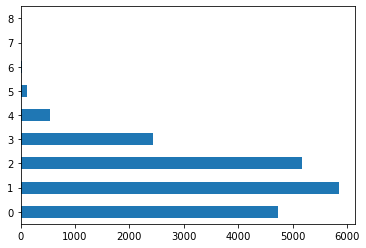

In [50]:
beds_df.plot.barh()

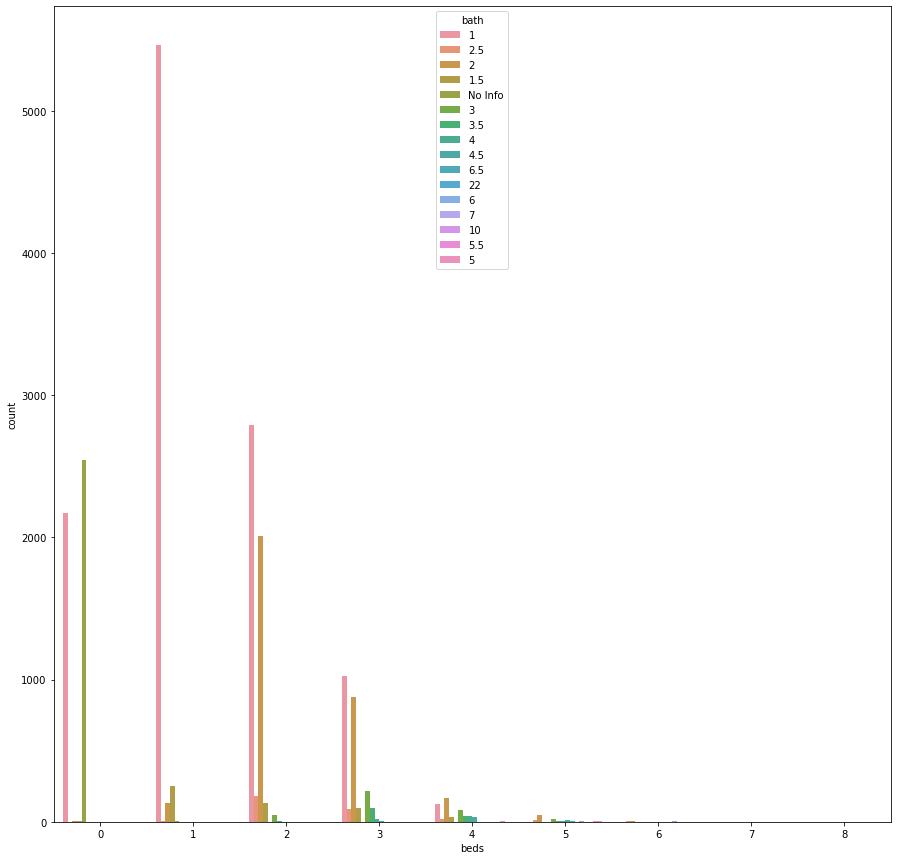

In [57]:
fig, ax = plt.subplots(figsize = (15,15))
g1 = sns.countplot(x = 'beds', hue = 'bath', data = data, ax = ax)

In [80]:
n_df = data.groupby(['Neighborhood','beds', 'bath']).count()['price']

In [81]:
print(n_df)

Neighborhood  beds  bath
Annadale      1     1         1
Arverne       2     1         2
Astoria       0     1        23
              1     1       105
                    3         1
                           ... 
Yorkville     4     3         1
                    3.5       1
                    4         1
                    4.5       1
                    5.5       1
Name: price, Length: 1732, dtype: int64
